### Loading the Libraries 

In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import norm
from scipy import stats 
warnings.filterwarnings('ignore')

### Loading the Dataset

In [231]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv")

In [232]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#### Lets get to know more about the dataset

In [233]:
print(f"number of rows: {df.shape[0]:,}\nnumber of columns: {df.shape[1]:,}")

number of rows: 550,068
number of columns: 10


Lets check for null values 

In [234]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Lets check for unique values 

In [235]:
df.nunique().sort_values(ascending= False)

Purchase                      18105
User_ID                        5891
Product_ID                     3631
Occupation                       21
Product_Category                 20
Age                               7
Stay_In_Current_City_Years        5
City_Category                     3
Gender                            2
Marital_Status                    2
dtype: int64

checking for duplicates 

In [236]:
df.duplicated().sum()

0

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


changing the type from object to category

In [238]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [239]:
cols = ['User_ID','Product_ID', 'Gender', 'Age','City_Category','Stay_In_Current_City_Years', 'Marital_Status']

df[cols] = df[cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(3)
memory usage: 17.6 MB


In [240]:
df.describe(include=['object', 'category']).T


,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731


From the above tabel we see that.                  

frequently bought product : P00265242

Gender who shops more: male

age range of frequent shopper: 26-35

city_category: B type 

unmarried people shop more

In [241]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Product_Category,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [242]:
df['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

Replacing Value 0, 1 in column martial status with 'Unmarried' and 'Married' respectively 

In [243]:
df['Marital_Status'].replace(0, "Umarried" , inplace= True )
df['Marital_Status'].replace(1, "Married", inplace= True )

In [244]:
df['Marital_Status'].value_counts()

Marital_Status
Umarried    324731
Married     225337
Name: count, dtype: int64

Doing the univariate analysis of the data

<Axes: xlabel='City_Category', ylabel='count'>

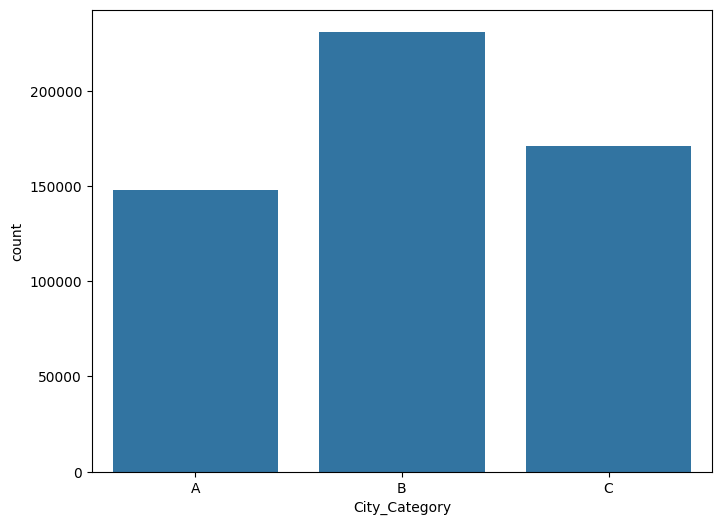

In [245]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['City_Category'])

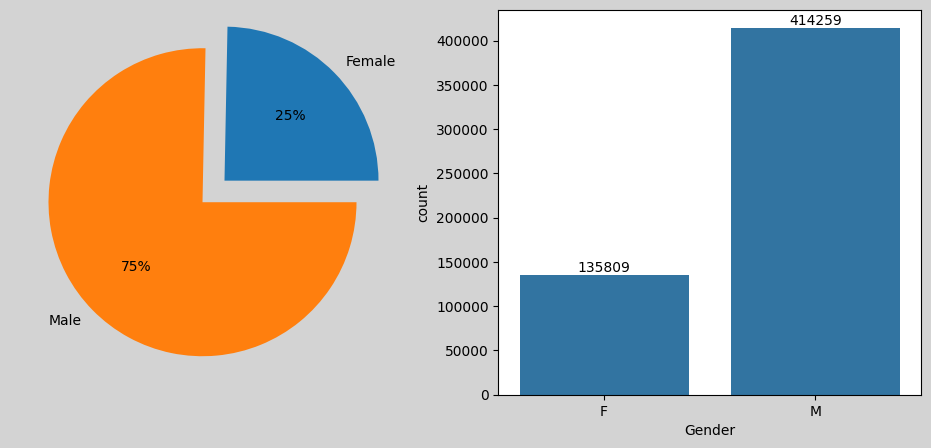

In [246]:
plt.figure(figsize= (12,5)).set_facecolor("lightgrey")

plt.subplot(1,2,1)
label = ["Female", "Male"]
plt.pie(df.groupby('Gender')['Gender'].count(), labels= label, explode= (0.20,0), autopct= '%0.0f%%')

plt.subplot(1,2,2)
label = sns.countplot(data= df, x = 'Gender')

for i in label.containers:
    label.bar_label(i)

plt.show()

In [247]:

def univariate (D, x_list: list):
    for items in x_list:

        plt.figure(figsize= (12,5)).set_facecolor("lightgrey")

        plt.subplot(1,2,1)
        label = D[items].unique().tolist()
        plt.pie(D.groupby(items)[items].count(), labels= label,  autopct= '%0.0f%%')
        plt.title ('Elements as total percent of whole')
        plt.subplot(1,2,2)
        ax = sns.countplot(data= D, x = items)

        for i in ax.containers:
            ax.bar_label(i)

        plt.title (f'Distribution of {items} by count')
        plt.show()

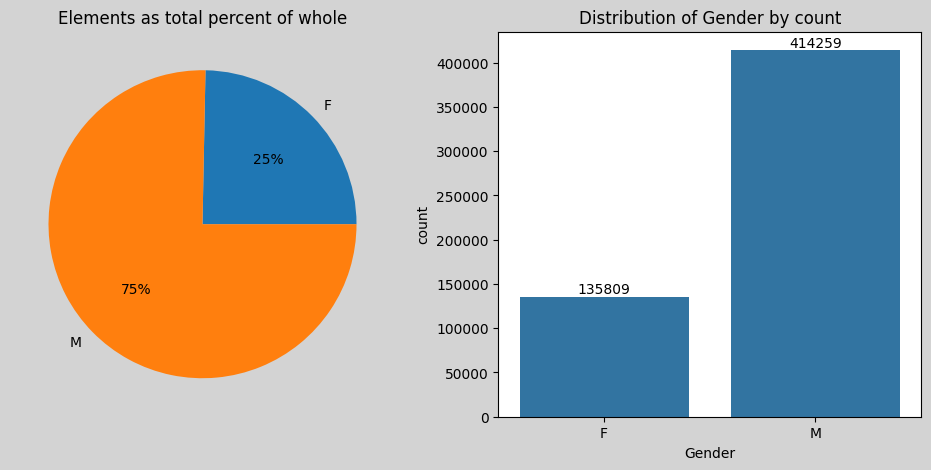

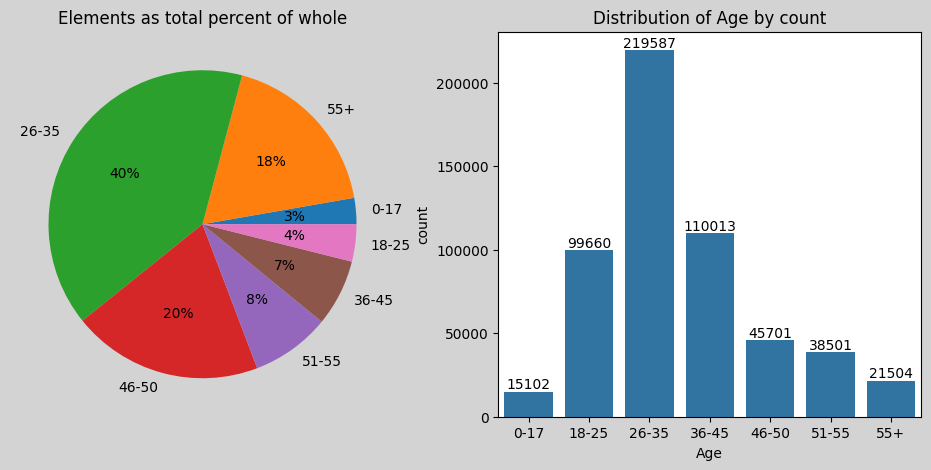

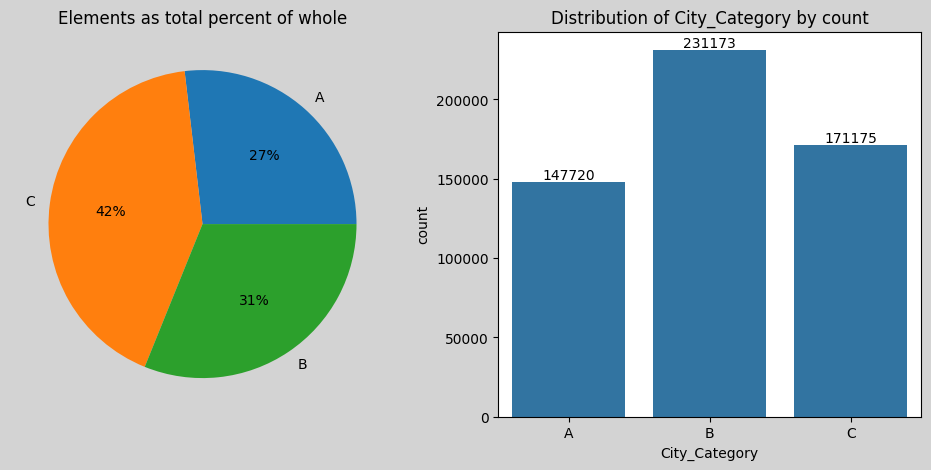

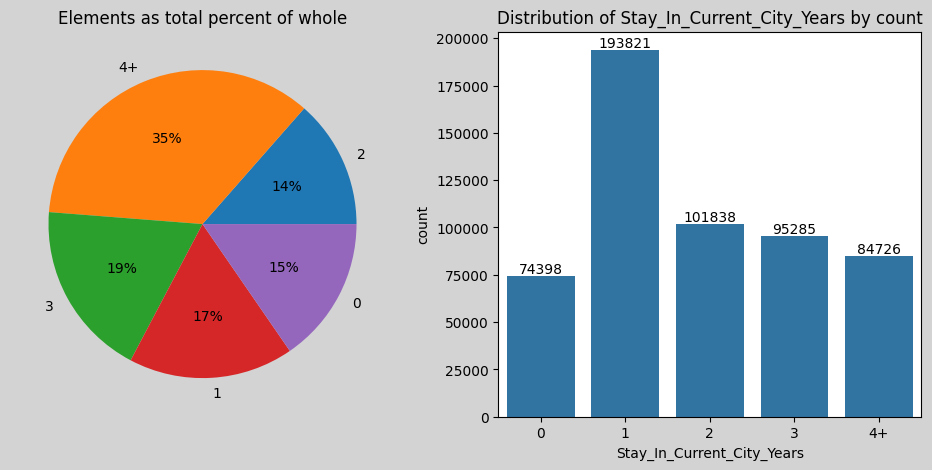

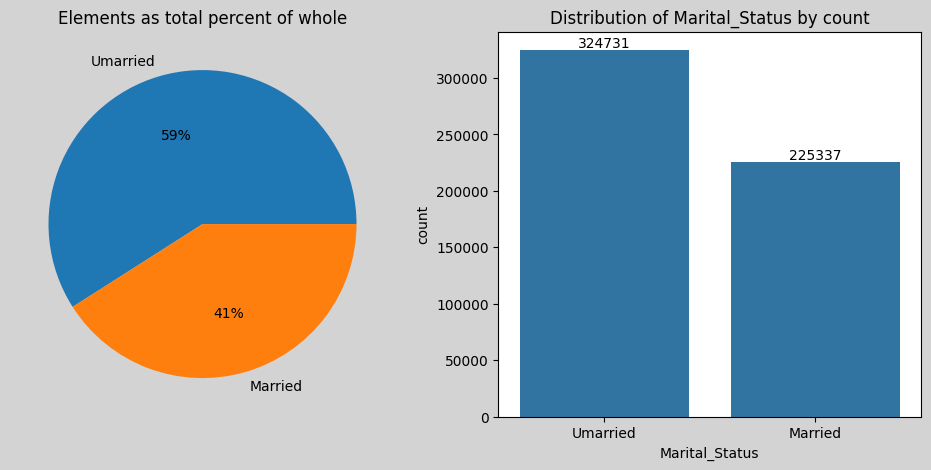

In [248]:
univariate(df,
           x_list= [ 'Gender', 'Age','City_Category','Stay_In_Current_City_Years', 'Marital_Status'])

## Bi - variate analysis 

In [249]:
def bivariate(Data, x_items: list):
    for ele in x_items:


        plt.figure(figsize= (8,5)).set_facecolor("lightgrey")
        sns.boxplot( data = Data, y = 'Purchase', x = ele, palette= 'Set3')
        plt.title(f'Purchase vs {ele}')
        plt.show()

        

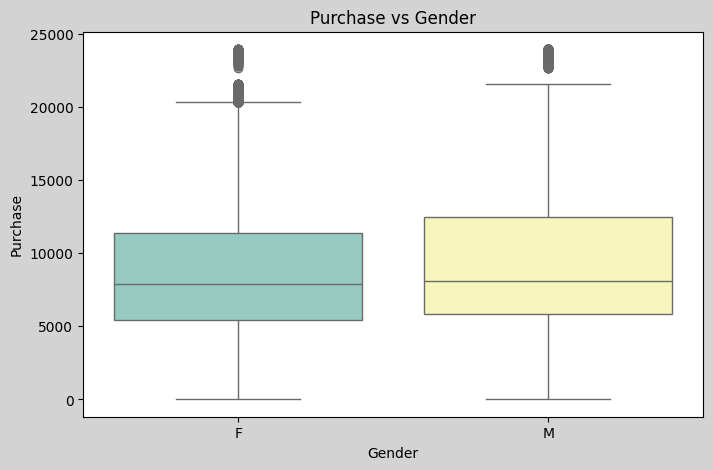

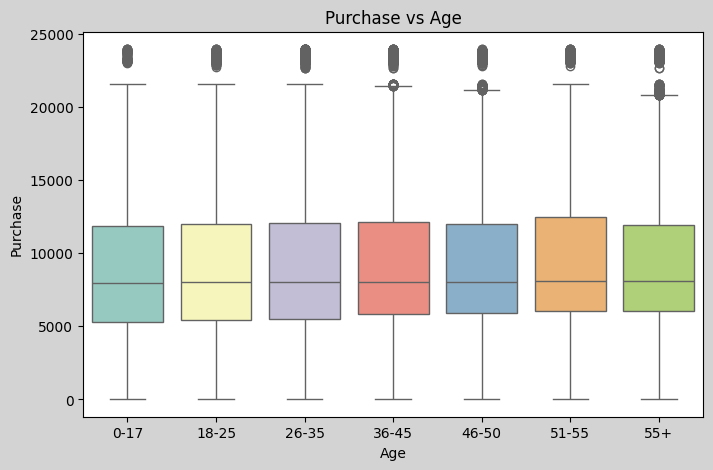

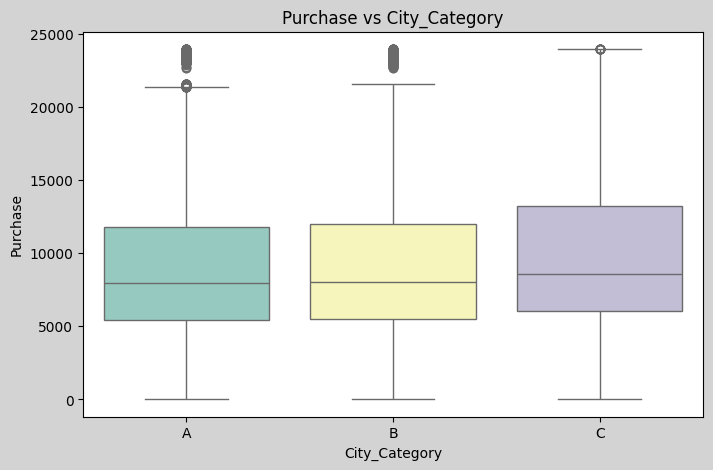

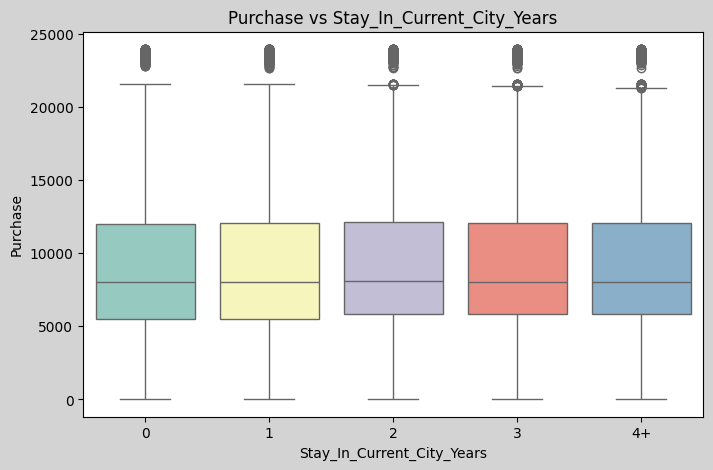

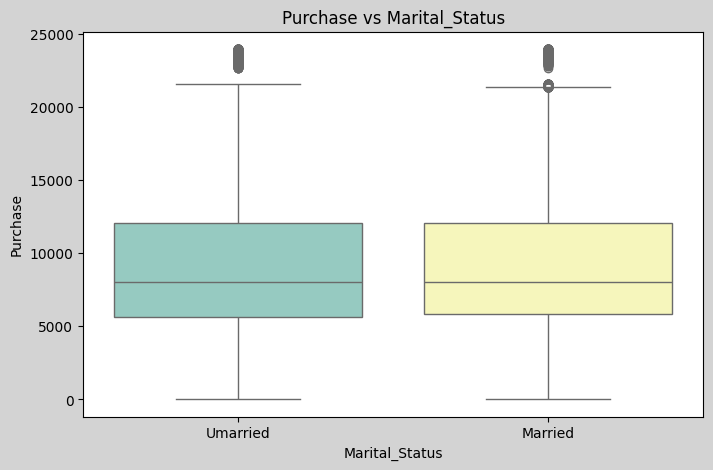

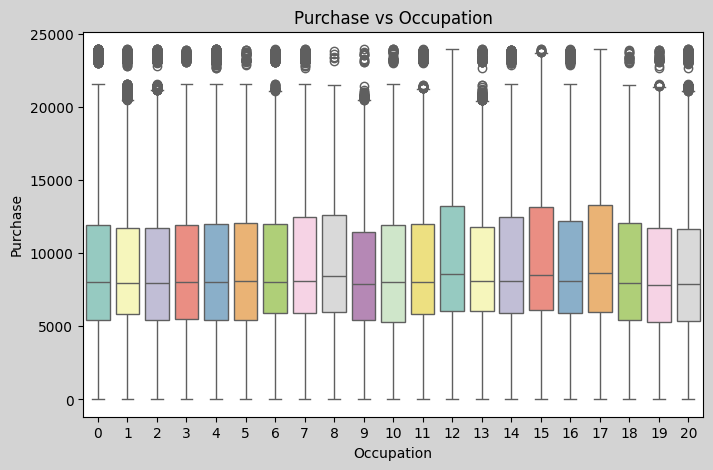

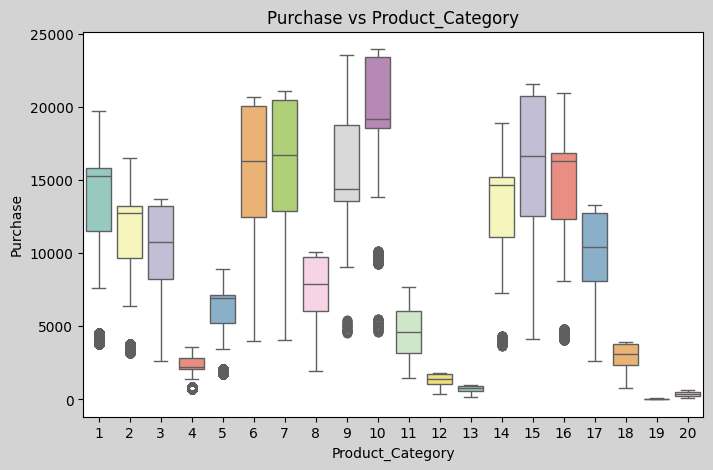

In [250]:
bivariate(df, x_items= ['Gender', 'Age','City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Occupation', 'Product_Category'])

In [255]:
def bivariate_describe(dataframe, x_ele: list):
    for elements in x_ele:

        dataframe.groupby([elements])['Purchase'].describe()

In [256]:
bivariate_describe(df, 
                   x_ele = ['Gender', 'Age','City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Occupation', 'Product_Category'])

In [259]:

df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0
